<a href="https://colab.research.google.com/github/QSJOE/ISYS2001-business-report-from-Joe/blob/main/%E2%80%9C%E5%A4%96%E9%83%A8%E6%95%B0%E6%8D%AE%EF%BC%9A%E6%9C%AC%E5%9C%B0%E6%96%87%E4%BB%B6%E3%80%81Google_%E4%BA%91%E7%AB%AF%E7%A1%AC%E7%9B%98%E3%80%81Google_%E8%A1%A8%E6%A0%BC%E5%92%8C_Cloud_Storage%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

此笔记本提供了用于加载和保存外部来源中的数据的方法。

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive

'Colab Notebooks'
 enron_sqlite3.db
'Week10.Environmental Protection.ppt'
'Week 2.Rituals & the life cycle.ppt'
'Week 3.Family & marriage.ppt'
'Week 4.Gender & sexuality.ppt'
'Week 5.community & Neighbourhood.ppt'
'Week 6.education.ppt'
'Week 7.Status and Hierarchy.ppt'
'Week 8.Ethnic Minorities.ppt'
'Week 9.Urbanisation and its impact in China.ppt'


In [ ]:
import sqlite3
mydb=sqlite3.connect("/content/drive/MyDrive/enron_sqlite3.db")
cursor=mydb.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
Tables=cursor.fetchall()
print(Tables)

[('employeelist',), ('message',), ('recipientinfo',), ('referenceinfo',)]


In [ ]:
cursor.execute("SELECT date(date) as date_sent, count(mid) as message_cnt FROM message where date>='1979-12-31' group by date_sent ORDER BY date_sent;")
Tables1=cursor.fetchall()
Tables1

[('1979-12-31', 6),
 ('1997-01-01', 1),
 ('1998-01-04', 1),
 ('1998-01-05', 1),
 ('1998-10-30', 3),
 ('1998-11-02', 1),
 ('1998-11-03', 1),
 ('1998-11-04', 4),
 ('1998-11-05', 1),
 ('1998-11-13', 2),
 ('1998-11-19', 8),
 ('1998-11-20', 3),
 ('1998-11-24', 2),
 ('1998-11-25', 1),
 ('1998-11-26', 1),
 ('1998-11-30', 3),
 ('1998-12-01', 3),
 ('1998-12-02', 5),
 ('1998-12-03', 5),
 ('1998-12-04', 2),
 ('1998-12-05', 1),
 ('1998-12-08', 1),
 ('1998-12-09', 3),
 ('1998-12-10', 1),
 ('1998-12-11', 1),
 ('1998-12-14', 2),
 ('1998-12-15', 1),
 ('1998-12-16', 8),
 ('1998-12-17', 1),
 ('1998-12-18', 3),
 ('1998-12-21', 7),
 ('1998-12-22', 2),
 ('1998-12-23', 3),
 ('1998-12-30', 3),
 ('1998-12-31', 1),
 ('1999-01-04', 3),
 ('1999-01-05', 2),
 ('1999-01-06', 2),
 ('1999-01-07', 3),
 ('1999-01-08', 4),
 ('1999-01-12', 4),
 ('1999-01-13', 7),
 ('1999-01-14', 4),
 ('1999-01-15', 7),
 ('1999-01-18', 5),
 ('1999-01-19', 1),
 ('1999-01-20', 4),
 ('1999-01-21', 1),
 ('1999-01-22', 1),
 ('1999-01-23', 1),


In [ ]:
date_sent,message_cnt=zip(*Tables1)

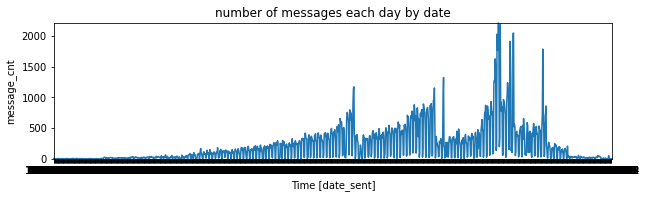

In [ ]:
import matplotlib.pyplot as mtp
import numpy as np
mtp.figure(figsize=(10, 2.5))
mtp.plot(date_sent, message_cnt, "-", markerfacecolor="none", markeredgecolor="b", clip_on=False)
mtp.title("number of messages each day by date")
mtp.xlabel("Time [date_sent]")
mtp.ylabel("message_cnt")
mtp.axis([0,len(date_sent),0,np.max(message_cnt)])
mtp.show()

In [ ]:
cursor.execute(
'''SELECT sender, count(mid) AS message_count
 FROM message
 GROUP BY sender
 ORDER BY message_count desc
 limit 10;
''')
Tables2=cursor.fetchall()
Tables2

[('jeff.dasovich@enron.com', 6273),
 ('j.kaminski@enron.com', 5838),
 ('kay.mann@enron.com', 5100),
 ('sara.shackleton@enron.com', 4797),
 ('tana.jones@enron.com', 4437),
 ('chris.germany@enron.com', 3686),
 ('no.address@enron.com', 3511),
 ('enron.announcements@enron.com', 2838),
 ('matthew.lenhart@enron.com', 2784),
 ('debra.perlingiere@enron.com', 2549)]

In [ ]:
sender,message_count=zip(*Tables2)

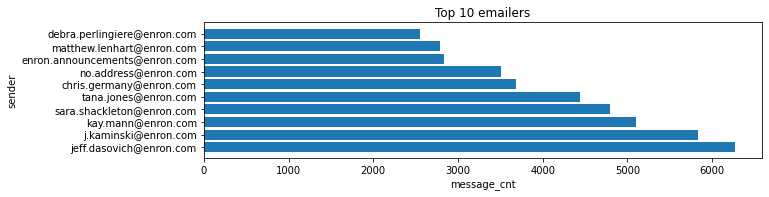

In [ ]:
import matplotlib.pyplot as mtp
import numpy as np
mtp.figure(figsize=(10, 2.5))
mtp.barh(sender, message_count,) 
mtp.title("Top 10 emailers")
mtp.ylabel("sender")
mtp.xlabel("message_cnt")
# mtp.yticks(np.arange(len(message_cnt)), message_cnt)
mtp.show()